In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sp
from scipy import special as st
import math

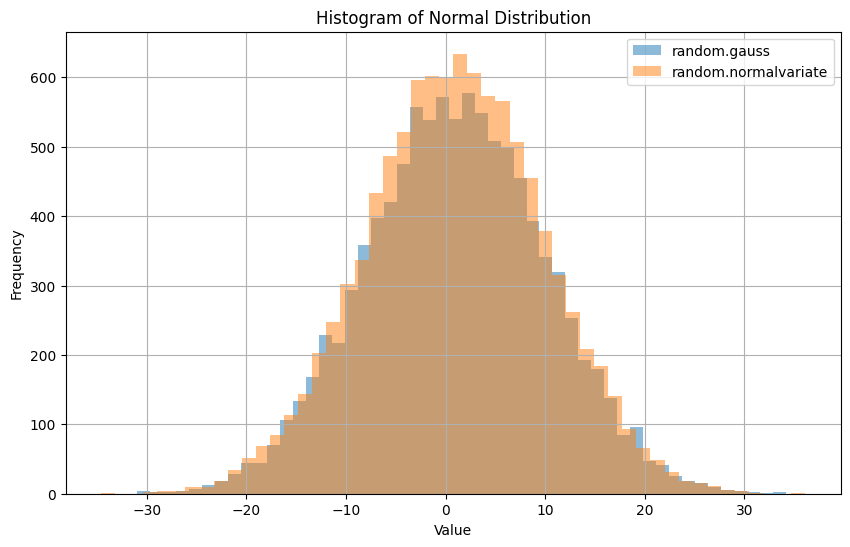

Математичне сподівання (random.gauss), теоретичне = 1: 1.0312901831580479
Дисперсія (random.gauss), теоретична = 81: 81.54462535197811
Математичне сподівання (random.normalvariate), теоретичне = 1: 1.0005702906433553
Дисперсія (random.normalvariate), теоретична = 81: 80.30223125053752 

Шапіро тест (random.gauss): ShapiroResult(statistic=0.9998956322669983, pvalue=0.9601395726203918)
Шапіро тест (random.normalvariate): ShapiroResult(statistic=0.9998807907104492, pvalue=0.918759822845459)
Значення p достатньо високе, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані можуть бути з нормального розподілу.


In [3]:
#Завдання 1
mu, sigma = 1, 9
n = 10_000
data_gauss = [random.gauss(mu, sigma) for i in range(n)]
data_normalvariate = [random.normalvariate(mu, sigma) for i in range(n)]

plt.figure(figsize=(10, 6))
plt.hist(data_gauss, bins=50, alpha=0.5, label='random.gauss')
plt.hist(data_normalvariate, bins=50, alpha=0.5, label='random.normalvariate')
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

mean_gauss = np.mean(data_gauss)
mean_normalvariate = np.mean(data_normalvariate)
variance_gauss = np.var(data_gauss)
variance_normalvariate = np.var(data_normalvariate)
print("Математичне сподівання (random.gauss), теоретичне = 1:", mean_gauss)
print("Дисперсія (random.gauss), теоретична = 81:", variance_gauss)
print("Математичне сподівання (random.normalvariate), теоретичне = 1:", mean_normalvariate)
print("Дисперсія (random.normalvariate), теоретична = 81:", variance_normalvariate, "\n")

#Перевірити гіпотезу про закон розподілу, чи є вибірка даних взята з нормального розподілу
print("Шапіро тест (random.gauss):", sp.shapiro(data_gauss))
print("Шапіро тест (random.normalvariate):", sp.shapiro(data_normalvariate))
print("Значення p достатньо високе, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані можуть бути з нормального розподілу.")

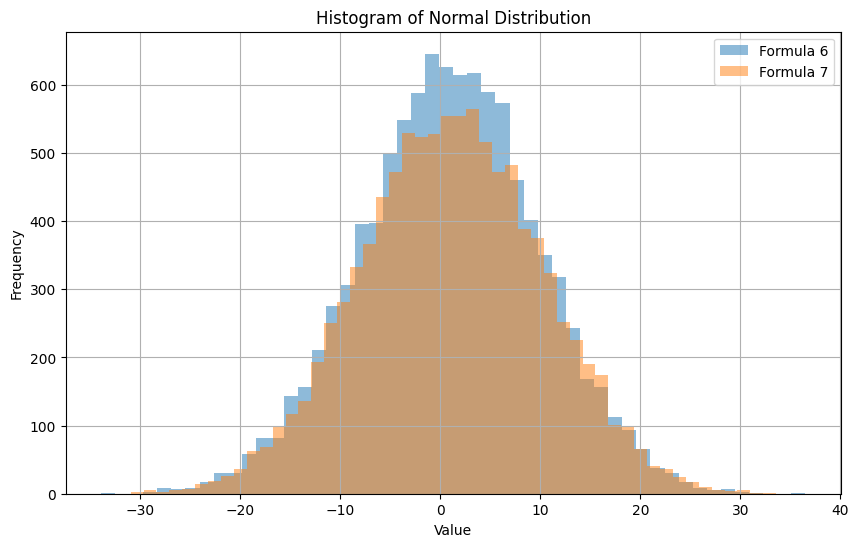

Математичне сподівання для формули 6 (теоретичне = 1): 0.9634773046908822
Дисперсія для формули 6 (теоретична = 81): 79.46591326589356
Математичне сподівання для формули 7 (теоретичне = 1): 1.143087292311211
Дисперсія для формули 7 (теоретична = 81): 82.81681869614408 

Шапіро тест для формули 6: ShapiroResult(statistic=0.9997875094413757, pvalue=0.439975768327713)
Шапіро тест для формули 7: ShapiroResult(statistic=0.9998458027839661, pvalue=0.7602755427360535)


In [9]:
#Завдання 2
n = 10_000
mu, sigma = 1, 9

def get_normal():
    a1 = random.random()
    a2 = random.random()
    return math.sqrt(-2*math.log(a1))*math.sin(2*math.pi*a2)

def get_normal2(mu, sigma):
    alpha_values = [random.random() for i in range(12)]
    z = sum(alpha - 0.5 for alpha in alpha_values)
    return mu + sigma * z

data_6 = [mu + sigma*get_normal() for i in range(n)]
data_7 = [get_normal2(mu, sigma) for i in range(n)]

plt.figure(figsize=(10, 6))
plt.hist(data_6, bins=50, alpha=0.5, label='Formula 6')
plt.hist(data_7, bins=50, alpha=0.5, label='Formula 7')
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

mean = np.mean(data_6)
variance = np.var(data_6)
mean2 = np.mean(data_7)
variance2 = np.var(data_7)
print("Математичне сподівання для формули 6 (теоретичне = 1):", mean)
print("Дисперсія для формули 6 (теоретична = 81):", variance)
print("Математичне сподівання для формули 7 (теоретичне = 1):", mean2)
print("Дисперсія для формули 7 (теоретична = 81):", variance2, "\n")

#Перевірити гіпотезу про закон розподілу, чи є вибірка даних взята з нормального розподілу
print("Шапіро тест для формули 6:", sp.shapiro(data_6))
print("Шапіро тест для формули 7:", sp.shapiro(data_7))
#print("Значення p високе, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані можуть бути з нормального розподілу.")

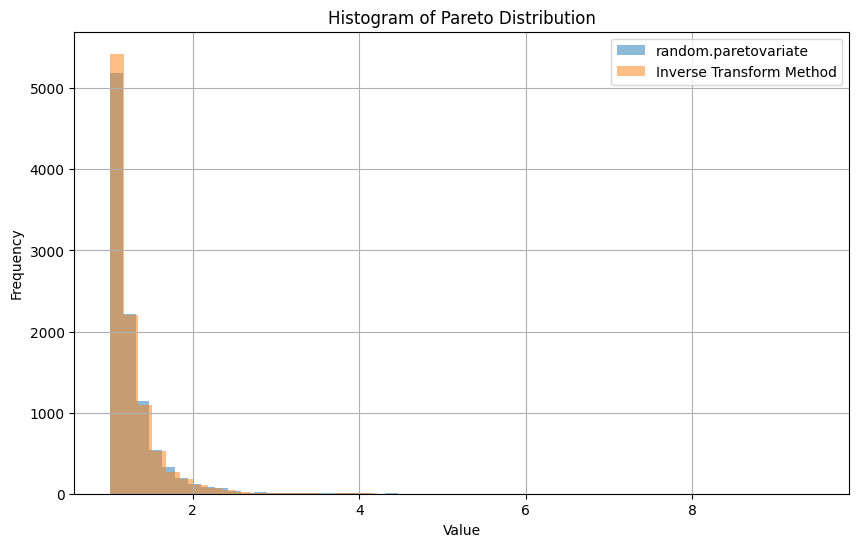

Математичне сподівання (random.paretovariate): 1.2541134410460808
Дисперсія (random.paretovariate): 0.1162274137022815
Математичне сподівання (Inverse Transform Method): 1.2504075191505355
Дисперсія (Inverse Transform Method): 0.10470037437521576 

Теоретичне середнє значення: 1.25
Теоретична дисперсія: 0.10416666666666667 

random.paretovariate: KstestResult(statistic=0.006357173113164194, pvalue=0.811280714328526)
формула 8: KstestResult(statistic=0.00537293950163098, pvalue=0.9334797030050068)


In [8]:
#Завдання 3
n = 10_000
k = 5
x_min = 1

data_pareto = [random.paretovariate(k) for i in range(n)]

# Метод оберненої функції для моделювання розподілу Парето
def get_pareto():
    alpha = random.random()
    return x_min * (1 - alpha) ** (-1/k)

data_pareto_inv = [get_pareto() for i in range(n)]

plt.figure(figsize=(10, 6))
plt.hist(data_pareto, bins=50, alpha=0.5, label='random.paretovariate')
plt.hist(data_pareto_inv, bins=50, alpha=0.5, label='Inverse Transform Method')
plt.title('Histogram of Pareto Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

mean_pareto = np.mean(data_pareto)
variance_pareto = np.var(data_pareto)
mean_pareto_inv = np.mean(data_pareto_inv)
variance_pareto_inv = np.var(data_pareto_inv)
print("Математичне сподівання (random.paretovariate):", mean_pareto)
print("Дисперсія (random.paretovariate):", variance_pareto)
print("Математичне сподівання (Inverse Transform Method):", mean_pareto_inv)
print("Дисперсія (Inverse Transform Method):", variance_pareto_inv, "\n")

print("Теоретичне середнє значення:", k*x_min/(k-1))
print("Теоретична дисперсія:", (x_min/(k-1))**2*(k/(k-2)), "\n")

#Перевірити гіпотезу про закон розподілу, чи є вибірка даних взята з Парето розподілу
print("random.paretovariate:", sp.kstest(data_pareto, 'pareto', args=(k,)))
print("формула 8:", sp.kstest(data_pareto_inv, 'pareto', args=(k,)))

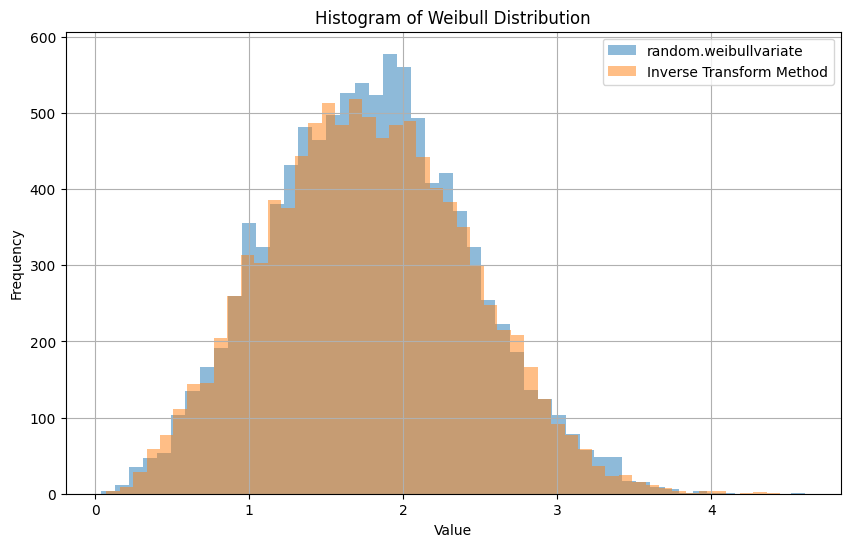

Математичне сподівання (random.weibullvariate): 1.7804004282584014
Дисперсія (random.weibullvariate): 0.4158062483505118
Математичне сподівання (Inverse Transform Method): 1.7769204483999619
Дисперсія (Inverse Transform Method): 0.42286388410472137 

Теоретичне середнє значення: 1.7859590231384979
Теоретична дисперсія: 0.42133153947391655 

random.weibullvariate: KstestResult(statistic=0.7695974993267828, pvalue=0.0)
формула 9: KstestResult(statistic=0.7633778116751735, pvalue=0.0)


In [6]:
#Завдання 4
n = 10_000
k = 3
lamda = 2

data_weibul = [random.weibullvariate(lamda, k) for i in range(n)]

# Метод оберненої функції для моделювання розподілу Вейбулла
def get_weibul():
    alpha = random.random()
    return lamda*(-math.log(1-alpha))**(1/k)

data_weibul_inv = [get_weibul() for i in range(n)]

plt.figure(figsize=(10, 6))
plt.hist(data_weibul, bins=50, alpha=0.5, label='random.weibullvariate')
plt.hist(data_weibul_inv, bins=50, alpha=0.5, label='Inverse Transform Method')
plt.title('Histogram of Weibull Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

mean_weibul = np.mean(data_weibul)
variance_weibul = np.var(data_weibul)
mean_weibul_inv = np.mean(data_weibul_inv)
variance_weibul_inv = np.var(data_weibul_inv)
print("Математичне сподівання (random.weibullvariate):", mean_weibul)
print("Дисперсія (random.weibullvariate):", variance_weibul)
print("Математичне сподівання (Inverse Transform Method):", mean_weibul_inv)
print("Дисперсія (Inverse Transform Method):", variance_weibul_inv, "\n")

print("Теоретичне середнє значення:", lamda*st.gamma(1 + 1/k))
term2 = st.gamma(1 + 2/k) - st.gamma(1 + 1/k) ** 2
print("Теоретична дисперсія:", lamda ** 2 * term2, "\n")

#Перевірити гіпотезу про закон розподілу, чи є вибірка даних взята з Вейбулла розподілу
print("random.weibullvariate:", sp.kstest(data_weibul, 'weibull_min', args=(k,lamda)))
print("формула 9:", sp.kstest(data_weibul_inv, 'weibull_min', args=(k,lamda)))

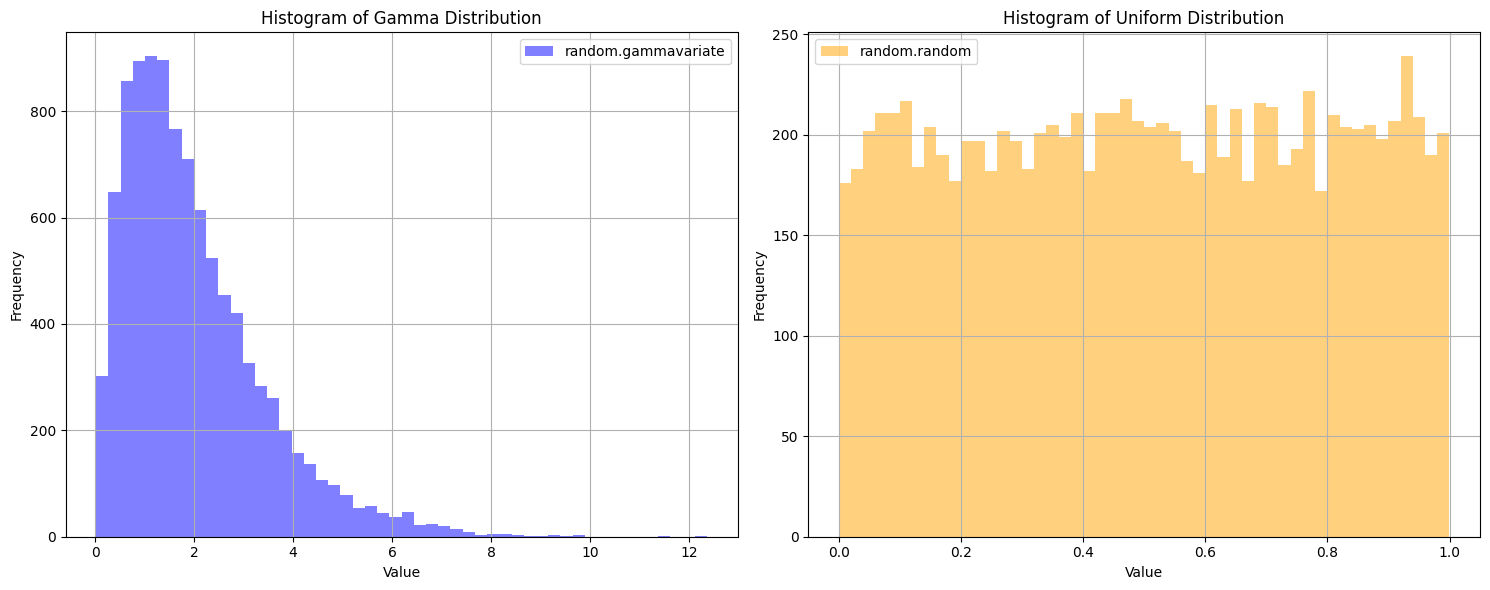

Математичне сподівання (random.gammavariate): 1.995319545355611
Дисперсія (random.gammavariate): 2.0185846692779483
Теоретичне середнє значення для Гамма розподілу: 2
Теоретична дисперсія для Гамма розподілу: 2 

Математичне сподівання (random.random): 0.5045250388080491
Дисперсія (random.random): 0.08321622395664531
Теоретичне середнє значення для рівномірного розподілу: 0.5
Теоретична дисперсія для рівномірного розподілу: 0.08333333333333333 

Гамма розподіл: KstestResult(statistic=0.008675988198458717, pvalue=0.43654030066547067)
Рівномірний розподіл: KstestResult(statistic=0.009628009642033697, pvalue=0.31005256446427876)


In [7]:
#Завдання 5
n = 10_000
alpha = 2
beta = 1

data_gamma = [random.gammavariate(alpha, beta) for i in range(n)]
data_eq = [random.random() for i in range(n)]

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(data_gamma, bins=50, alpha=0.5, color='blue', label='random.gammavariate')
plt.title('Histogram of Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data_eq, bins=50, alpha=0.5, color='orange', label='random.random')
plt.title('Histogram of Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mean_gamma = np.mean(data_gamma)
variance_gamma = np.var(data_gamma)
mean_eq = np.mean(data_eq)
variance_eq = np.var(data_eq)
print("Математичне сподівання (random.gammavariate):", mean_gamma)
print("Дисперсія (random.gammavariate):", variance_gamma)
print("Теоретичне середнє значення для Гамма розподілу:", alpha*beta)
print("Теоретична дисперсія для Гамма розподілу:", alpha*(beta**2), "\n")

print("Математичне сподівання (random.random):", mean_eq)
print("Дисперсія (random.random):", variance_eq)
print("Теоретичне середнє значення для рівномірного розподілу:", 1/2)
print("Теоретична дисперсія для рівномірного розподілу:", 1/12, "\n")

#Перевірити гіпотезу про закон розподілу, чи є вибірка даних взята з Вейбулла розподілу
print("Гамма розподіл:", sp.kstest(data_gamma, 'gamma', args=(alpha, 0, beta)))
print("Рівномірний розподіл:", sp.kstest(data_eq, 'uniform'))